# there's a lot of stuff here that needs to be cleaned up.
for example this first cell has plotting stuff that im not sure when im going to need so watch out for that. 

the import section is pretty straight forward. 


### 20250524  
note = subj vs group comparison has been updated with 'fair model comparison' which provides a more suitable way of identifying the participant-specific benefit over the group

right now, the only thing this notebook offers that is different from the fairmodel comparison one isthat it has the subplots with the scatterplots for a SL to show individual participant reliabilty ~ evidence correlations <--- false, now the fairmodel notebook has the scatterplots rendering this notebook redundant (other than including a less fair model comparison analysis)

# import

In [1]:
from tqdm import tqdm_notebook
import numpy as np
import deepdish as dd
import os
import h5py
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# from _classification_util import *
# from _mempal_util import *
from _searchlight_util import *

In [2]:
# ls ../PythonData2024/Output/Reliability2Evidence 

In [1]:
ls -lt /jukebox/norman/rmasis/MemPal/analysis/MemPal2024/PythonData2024/Logs/reliability2evidence/ | head -n 5

total 12459136
-rw-rw-r--. 1 rmasis normanlab  836 May 24 15:40 slurm_-971364.log
-rw-rw-r--. 1 rmasis normanlab  174 May 24 15:36 slurm_-971363.log
-rw-rw-r--. 1 rmasis normanlab  174 May 24 15:36 slurm_-971354.log
-rw-rw-r--. 1 rmasis normanlab  174 May 24 15:36 slurm_-971325.log
ls: write error: Broken pipe


In [2]:
cat /jukebox/norman/rmasis/MemPal/analysis/MemPal2024/PythonData2024/Logs/reliability2evidence/slurm_-971364.log

Slurm job ID:  971364
Slurm array task ID / SL ID:  1
Sat May 24 03:36:57 PM EDT 2025
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 22
(23,) (23,) 22
(23,) (23,) 22
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 21
(23,) (23,) 22
(23,) (23,) 23
(23,) (23,) 22
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 20
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 23
(23,) (23,) 22
Folder already exists: ../PythonData2024/Output/Reliability2Evidence
subj_reliability~evidence
group_reliability~evidence
m0_coeffs
m1_coeffs
m0_r2
m1_r2
m0_aic
m1_aic
m0_f
m1_f
done running and saving stuff.
SAVED at:  ../PythonData2024/Output/Reliability2Evidence/20250524_SL001_L_reliability2evidence_ROCN_GR.h5
Finished running this subj.
Sat May 24 03:40:05 PM EDT 2025


In [6]:
#### CHECK IF SLs GENERATED
############################################

roi = 'SL'
nSubj =25
measure_key ='reliability'#'distinctiveness'#'reliability'
trial_type = 'GR'
network = 'ROCN'

# date = 20240108; shift = 4; win_size=9 ;
date = 20240401; shift = 4; win_size=9 ;

date = 20250524; shift = 4; win_size=9 ;


error_rois = {}
full_list = []
for betatype in ['objects']:#'objects']: #['rooms','objects']:
    error_rois[betatype] = {}
    for hem in ['L','R']:
        hem_label = hem
        betatype_label = betatype
        error_rois[betatype][hem] = []
        for roi_id in tqdm_notebook(range(len(SLlist[hem]))):

            dirpath = '../PythonData2024/Output/Reliability2Evidence'
            fname = '{}_{}{:03d}_{}_{}2evidence_{}_{}'.format(date,roi,roi_id,hem,measure_key,network,trial_type) + '.h5'
            

            fullpath = os.path.join(dirpath,fname)

            if os.path.exists(fullpath):
                continue
            else:
                error_rois[betatype][hem].append(roi_id)
                full_list.append(roi_id)



/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

In [7]:
[print(i,end=',') for i in np.unique(full_list)]

[]

In [8]:
roi = 'SL'
hems=['L','R']
nPerm = 1000
nSubj =25
nRooms = 23
nItems=23
nTrials = 23
measure_key ='reliability'#'distinctiveness'#'reliability'

scores = {}
rois = []


# date = 20240108


measure_list = ['subj_{}~evidence'.format(measure_key),'group_{}~evidence'.format(measure_key), 'm0_r2','m1_r2',]


date = 20240401 # second permutation test fix

date = 20250524 # update for revision repo


scores = {}
for network in ['ROCN','POCN']:
    scores[network]  = {}
    for trial_type in ['GR','FR']:
        scores[network][trial_type] = {}
        for measure in measure_list:
            scores[network][trial_type][measure] = {}
            
            for hem in ['L','R']:
        
                # if a correlation
                if '~' in measure:
                    scores[network][trial_type][measure][hem] = np.zeros((len(SLlist[hem]),nSubj, nPerm+1))

                if 'm0' or 'm1' in item: # for coeffs and aic
                    scores[network][trial_type][measure][hem] = np.zeros((len(SLlist[hem]), nSubj, nPerm+1))



                for roi_id in tqdm_notebook(range(len(SLlist[hem]))[:]):
                    savedir = '../PythonData2024/Output/Reliability2Evidence'
                    

                    filename = '{}_{}{:03d}_{}_{}2evidence_{}_{}'.format(date,roi,roi_id,hem,measure_key,network,trial_type) + '.h5'
                    fullpath = os.path.join(savedir, filename)

                    scores[network][trial_type][measure][hem][roi_id] =  dd.io.load(fullpath,'/{}'.format(measure))

 



/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

In [14]:
scores.keys()

dict_keys(['ROCN', 'POCN'])

In [13]:
scores[network][trial_type]['subj_reliability~evidence'][hem].shape

(1483, 25, 1001)

In [9]:
# whats the overall correlation of top N SLs?

item = 'subj_{}~evidence'.format(measure_key)
top_amount = 100 ;

top_r2r_ev = {} # reliabilty ~ evidence
for network in ['ROCN', 'POCN']:
    top_r2r_ev[network]  = {}
    for trial_type in ['GR','FR']:
        top_r2r_ev[network][trial_type] = {}
        
        for hem in ['L','R']:
            subj_mean = scores[network][trial_type][item][hem][:,:,0].mean(1) #average subj
            high_corr_idx = np.argsort(subj_mean)[::-1][:top_amount]
            
            print('corrs: ', network, trial_type, hem, subj_mean[high_corr_idx].mean())
            
            top_r2r_ev[network][trial_type][hem] = high_corr_idx
        


corrs:  ROCN GR L 0.0807210800053396
corrs:  ROCN GR R 0.08990707737862406
corrs:  ROCN FR L 0.10728907316948186
corrs:  ROCN FR R 0.10425187462975405
corrs:  POCN GR L 0.09881092737404548
corrs:  POCN GR R 0.0959316110826613
corrs:  POCN FR L 0.08798483571580214
corrs:  POCN FR R 0.08972950989182207


# what are the best performing SLs for GR and FR?

In [52]:
## ORIGINAL RESULTS 20240401 
## identify SLs with highest correlations

item = 'subj_{}~evidence'.format(measure_key)
top_amount = 5 ;

top_r2r_ev = {} # reliabilty ~ evidence
for network in ['ROCN', 'POCN']:
    top_r2r_ev[network]  = {}
    for trial_type in ['GR','FR']:
        top_r2r_ev[network][trial_type] = {}
        
        for hem in ['L','R']:
            subj_mean = scores[network][trial_type][item][hem][:,:,0].mean(1) #average subj
            high_corr_idx = np.argsort(subj_mean)[::-1][:top_amount]
            
            
            print('corrs: ', network, trial_type, hem, subj_mean[high_corr_idx].mean(), high_corr_idx)
            
            top_r2r_ev[network][trial_type][hem] = high_corr_idx
        


corrs:  ROCN GR L 0.1259513690966393 [ 674  675 1269 1071 1003]
corrs:  ROCN GR R 0.16224577430455037 [1076  920   73 1298  309]
corrs:  ROCN FR L 0.1797976772175846 [1041  597 1168  495  125]
corrs:  ROCN FR R 0.13281593572583006 [ 190  622  549 1213 1148]
corrs:  POCN GR L 0.1269163962190822 [285 746 349 550 308]
corrs:  POCN GR R 0.1273463044611483 [ 986  580 1127  985 1276]
corrs:  POCN FR L 0.12593463828739593 [ 966   22 1367  972 1433]
corrs:  POCN FR R 0.1189579456836852 [ 627 1162 1290    5  365]


In [1]:
# top_r2r_ev

# which are the best performing SLs when GR and FR are combined?

In [11]:
import numpy as np

def print_top_searchlights(scores, measure_key='subj_reliability~evidence',
                           top_thresh=100, networks=['ROCN', 'POCN']):
    for network in networks:
        print(f'\n=== {network} ===')
        for hem in ['L', 'R']:
            try:
                gr = scores[network]['GR'][measure_key][hem][:,:,0]
                fr = scores[network]['FR'][measure_key][hem][:,:,0]
                avg = (gr.mean(1) + fr.mean(1)) / 2

                top_idx = np.argsort(avg)[::-1][:top_thresh]
                print(f'{hem}: top {top_thresh} SLs →', top_idx.tolist())

            except Exception as e:
                print(f'{network} {hem} failed: {e}')

                
print_top_searchlights(scores, top_thresh=5)



=== ROCN ===
L: top 5 SLs → [1041, 59, 836, 1168, 289]
R: top 5 SLs → [1076, 388, 73, 1169, 190]

=== POCN ===
L: top 5 SLs → [972, 966, 738, 1364, 584]
R: top 5 SLs → [1391, 144, 422, 580, 1395]


# what are the corr values for GR or FR for best SLs?

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_corrs_per_subject(scores, network='ROCN', trial_type='GR', hem='R',
                           measure_key='subj_reliability~evidence', sl_index=0):
    """
    Plots one subplot per subject showing the real (non-permuted) correlation
    for a given searchlight index.
    """
    # shape: (nSLs, nSubj, nPerm+1)
    data = scores[network][trial_type][measure_key][hem]

    if sl_index >= data.shape[0]:
        print(f"Invalid SL index: {sl_index}. Must be < {data.shape[0]}")
        return

    real_corrs = data[sl_index, :, 0]  # shape: (25,)
    n_subj = real_corrs.shape[0]

    # Create subplots (5 rows x 5 cols for 25 subjects)
    fig, axs = plt.subplots(5, 5, figsize=(12, 10), constrained_layout=True)
    axs = axs.flatten()

    for i in range(n_subj):
        axs[i].bar(0, real_corrs[i])
        axs[i].set_ylim(-1, 1)
        axs[i].set_title(f'Subj {i+1}')
        axs[i].set_xticks([])
        axs[i].axhline(0, color='black', linewidth=0.5)

    fig.suptitle(f'True Correlations for SL {sl_index} | {network} {trial_type} {hem}', fontsize=14)
    plt.show()


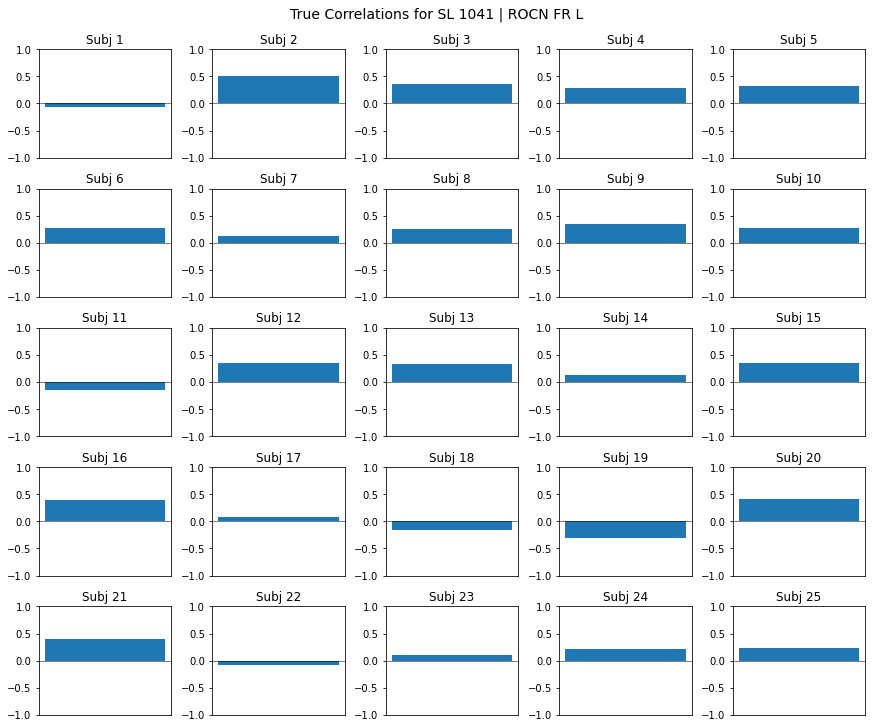

In [53]:
plot_corrs_per_subject(scores, network='ROCN', trial_type='FR', hem='L', sl_index=1041)


# what do scatterplots look like between reliability and evidence for GRs and FRs?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import deepdish as dd
import os
from scipy import stats
from scipy.stats import zscore

from _mempal_util import load_obj

def plot_reliability_vs_evidence_per_subject(roi_id, hem, sl_index, network, trial_type,
                                              reliability_date=20240108,
                                              rip_date=20250524,
                                              shift=4,
                                              top_thresh=50,
                                              measure_key='reliability',
                                              z = True):
    """
    Plots 25 scatter plots (one per subject) of room reliability vs. recall evidence
    for a given searchlight index and network, including a 45-degree reference line.
    """
    
    ref_line_scaler = 1

    # Load reliability
    reliability_dir = '../PythonData2024/Output/room2room'
    reliability_path = os.path.join(reliability_dir,
        f'{reliability_date}_SL{roi_id:03d}_{hem}_RoomReliability.h5')
    room_reliability = dd.io.load(reliability_path, group=f'/{measure_key}')[:, :, 0]  # (nItems, nSubj)

    # Load evidence
    evidence_path = os.path.join(
        '../PythonData2024/Output/RecallEvidence',
        f'{rip_date}_NetworksRecallEvidence_shift{shift}_top{top_thresh}.pkl'
    )
    network_evidence = load_obj(evidence_path)
    item_evidence = network_evidence[network][trial_type]  # shape: (nItems, nSubj)

    # Fixed axis limits (adjust if needed)
#     axis_min, axis_max = -3, 3
    # Precompute global z-score bounds if z=True
    if z:
        all_z = []
        for si in range(25):
            
            
            y_raw = item_evidence[:, si]
            x_raw = room_reliability[:, si]
            
            nonnans = ~np.isnan(y_raw)
            all_z.append(zscore(x_raw[nonnans]))
            all_z.append(zscore(y_raw[nonnans]))
        all_z = np.concatenate(all_z)
        z_limit = np.nanmax(np.abs(all_z))
        axis_min, axis_max = -z_limit, z_limit
        print(axis_min, axis_max)
    else:
        axis_min, axis_max = np.nanmin([room_reliability.min(), item_evidence.min()]), \
                             np.nanmax([room_reliability.max(), item_evidence.max()])


    fig, axs = plt.subplots(5, 5, figsize=(15, 12), constrained_layout=True)
    axs = axs.flatten()

#     for si in range(25):
#         x = room_reliability[:, si]
#         y = item_evidence[:, si]
#         nonnans = ~np.isnan(y)

#         corr = stats.pearsonr(x[nonnans], y[nonnans])[0]

#         axs[si].scatter(x, y, s=20, alpha=0.7)
# #         axs[si].plot([axis_min/ref_line_scaler, axis_max/ref_line_scaler], 
# #                      [axis_min/ref_line_scaler, axis_max/ref_line_scaler], 'k--', lw=1, alpha=0.4)  # 45° line

#         axs[si].set_title(f'Subj {si+1} | r={corr:.3f}', fontsize=9)
# #         axs[si].set_xlim(axis_min, axis_max)
# #         axs[si].set_ylim(axis_min, axis_max)
#         axs[si].axhline(0, color='gray', lw=0.5)
#         axs[si].axvline(0, color='gray', lw=0.5)
        
    for si in range(25):
        x_raw = room_reliability[:, si]
        y_raw = item_evidence[:, si]
        nonnans = ~np.isnan(y_raw)

        # Only use valid values
        if z:
            x = zscore(x_raw[nonnans])
            y = zscore(y_raw[nonnans])
        else:
            x = x_raw
            y = y_raw
            
        print('subj: ', si)
        print('room_reliability: ', x)
        print('object reinstatement: ', y)
        print('XXXXXXXXXXXXXXXXXXXXXX')
        corr = stats.pearsonr(x, y)[0]
        axs[si].scatter(x, y, s=20, alpha=0.7)
        
        axs[si].plot([axis_min/ref_line_scaler, axis_max/ref_line_scaler], 
                     [axis_min/ref_line_scaler, axis_max/ref_line_scaler], 'k--', lw=1, alpha=0.4)  # 45° line

        axs[si].set_xlim(axis_min, axis_max)
        axs[si].set_ylim(axis_min, axis_max)

#         # Best-fit line (on z-scored values)
#         slope, intercept = np.polyfit(x, y, 1)
#         axs[si].plot(x, slope * x + intercept, color='red', lw=1.2, alpha=0.8)

        axs[si].set_title(f'Subj {si+1} | r={corr:.3f}', fontsize=9)
        axs[si].axhline(0, color='gray', lw=0.5)
        axs[si].axvline(0, color='gray', lw=0.5)


    fig.suptitle(f'SL {sl_index} | {network} | {trial_type} | {hem}', fontsize=16)
    plt.show()


-3.461980838720866 3.461980838720866
subj:  0
room_reliability:  [ 0.84057765  1.80131965 -0.07684114 -1.81505269 -0.23326336 -1.1618596
 -0.70151651  0.29261109  1.01412477 -0.12664929  0.29918332 -1.09123558
  1.48319805  1.58701235 -0.5626592  -0.39456667  0.85438717  0.61133444
 -1.73393046 -0.87443626  0.06854774 -0.8671704   0.7868849 ]
object reinstatement:  [-0.76698455 -1.95897717 -1.19455373  0.60206663  0.30075006 -0.46169072
  0.2965143   0.2746043  -1.7401188   0.61543653 -0.44664342  0.4092046
  0.98921417  1.83886986 -0.62464414 -0.81302826  1.86904541  1.16833619
  0.36803618  0.81987748  0.09444356 -0.58160088 -1.05815759]
XXXXXXXXXXXXXXXXXXXXXX
subj:  1
room_reliability:  [ 0.55241638 -1.09290633  0.26932964  0.91300719  1.70916811  0.58075905
 -0.88879366 -0.21864015 -1.55742535  0.60633185 -0.69419335 -1.43598488
 -0.15110286 -0.87788195  2.0554091   0.35611228 -0.12560507]
object reinstatement:  [ 0.58320602 -0.74171175  0.89637293 -0.32270253 -1.38210396  0.759516

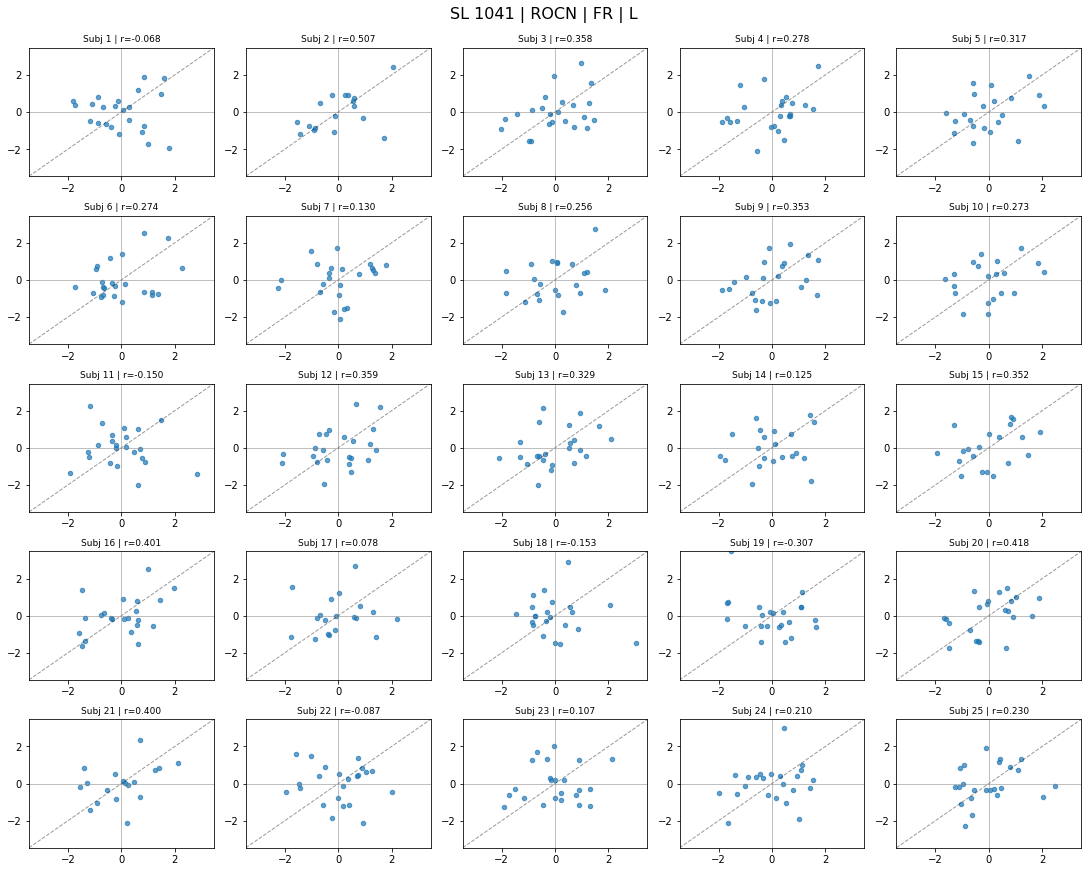

In [3]:
plot_reliability_vs_evidence_per_subject(
    roi_id=1041,      # your chosen SL index
    hem='L',
    sl_index=1041,    # same as roi_id here
    network='ROCN',
    trial_type='FR',
    z=True
)


In [8]:
room_obj_assignments['sub-sid01']

objname  objidx  roomidx    roomname
0   basketball      12        2       candy
1        plane       9       19  applecrate
2        brain       0        8    computer
3    breadloaf      18        6      island
4       burger      21        1          tv
5    butterfly      22       21     firepit
6      chicken      19        4        tool
7        darts       2       16    crystals
8        drums      16       17    colorful
9   playground      14       14       ruins
10      camera       3       13        cats
11       kerby      15       22       human
12       puppy       4        5     bedroom
13    skeleton      20        9    painting
14       rubix      10       11       chess
15     snowman      17        0    antiques
16        oven       7       15     clocks 
17    carriage       8        7      planet
18   teddybear      11       10     storage
19       chest       6       20        bday
20        trex       5       18       altar
21    tricycle       1       12       empty
22      zombie      13        3       class

In [4]:
from _mempal_util import room_obj_assignments


In [9]:
from _mempal_util import room_obj_assignments

room_obj_assignments['sub-sid02'].roomidx = room_obj_assignments['sub-sid02'].roomidx.astype(int)
room_names = room_obj_assignments['sub-sid01'].sort_values('roomidx')['roomname'].to_list()
obj_names = room_obj_assignments['sub-sid01'].sort_values('roomidx')['objname'].to_list()


In [20]:
room_obj_assignments['sub-sid02'].roomidx = room_obj_assignments['sub-sid02'].roomidx.astype(int)
room_obj_assignments['sub-sid02'].sort_values('roomidx')

objname  objidx  roomidx    roomname
18   teddybear      11        0    antiques
14       rubix      10        1          tv
10      camera       3        2       candy
20        trex       5        3       class
1        plane       9        4        tool
7        darts       2        5     bedroom
16        oven       7        6      island
6      chicken      19        7      planet
15     snowman      17        8    computer
11       kerby      15        9    painting
0   basketball      12       10     storage
9   playground      14       11       chess
13    skeleton      20       12       empty
4       burger      21       13        cats
12       puppy       4       14       ruins
21    tricycle       1       15     clocks 
5    butterfly      22       16    crystals
17    carriage       8       17    colorful
2        brain       0       18       altar
3    breadloaf      18       19  applecrate
19       chest       6       20        bday
8        drums      16       21     firepit
22      zombie      13       22       human

-3.461980838720866 3.461980838720866


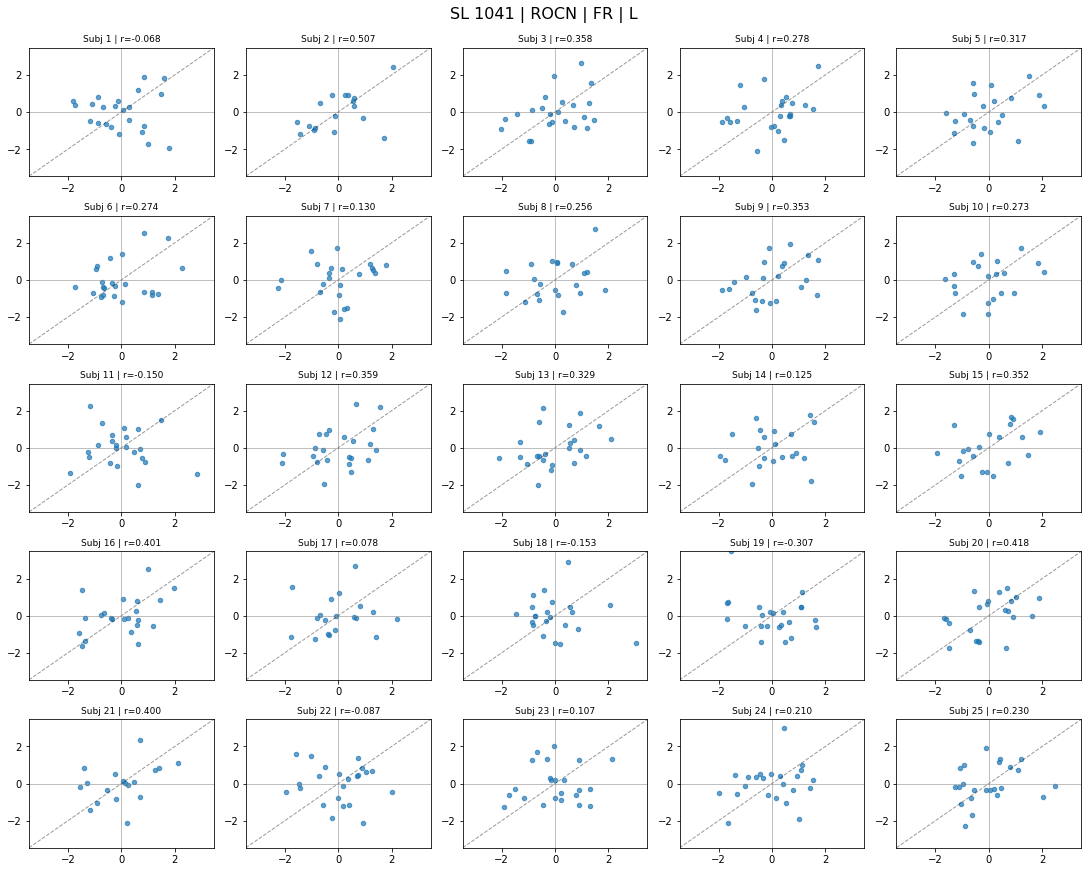

In [92]:
plot_reliability_vs_evidence_per_subject(
    roi_id=1041,      # your chosen SL index
    hem='L',
    sl_index=1041,    # same as roi_id here
    network='ROCN',
    trial_type='FR',
    z=True
)


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import deepdish as dd
import os
from scipy import stats
from scipy.stats import zscore
from _mempal_util import load_obj

def plot_reliability_vs_evidence_per_subject(roi_id, hem, sl_index, network, trial_type,
                                              reliability_date=20240108,
                                              rip_date=20250524,
                                              shift=4,
                                              top_thresh=50,
                                              measure_key='reliability',
                                              z=True):
    """
    Plots 25 scatter plots (one per subject) of room reliability vs. recall evidence,
    sorted by descending correlation.
    """

    # Load reliability
    reliability_path = os.path.join(
        '../PythonData2024/Output/room2room',
        f'{reliability_date}_SL{roi_id:03d}_{hem}_RoomReliability.h5'
    )
    room_reliability = dd.io.load(reliability_path, group=f'/{measure_key}')[:, :, 0]  # (nItems, nSubj)

    # Load evidence
    evidence_path = os.path.join(
        '../PythonData2024/Output/RecallEvidence',
        f'{rip_date}_NetworksRecallEvidence_shift{shift}_top{top_thresh}.pkl'
    )
    network_evidence = load_obj(evidence_path)
    item_evidence = network_evidence[network][trial_type]  # shape: (nItems, nSubj)

    # Determine axis limits
    if z:
        all_z = []
        for si in range(25):
            x_raw = room_reliability[:, si]
            y_raw = item_evidence[:, si]
            nonnans = ~np.isnan(y_raw)
            all_z.append(zscore(x_raw[nonnans]))
            all_z.append(zscore(y_raw[nonnans]))
        all_z = np.concatenate(all_z)
        z_limit = np.nanmax(np.abs(all_z))
        axis_min, axis_max = -z_limit, z_limit
    else:
        axis_min = np.nanmin([room_reliability.min(), item_evidence.min()])
        axis_max = np.nanmax([room_reliability.max(), item_evidence.max()])

    # Compute correlations and sort subjects
    correlations = []
    for si in range(25):
        x_raw = room_reliability[:, si]
        y_raw = item_evidence[:, si]
        nonnans = ~np.isnan(y_raw)
        x = zscore(x_raw[nonnans]) if z else x_raw[nonnans]
        y = zscore(y_raw[nonnans]) if z else y_raw[nonnans]
        r = stats.pearsonr(x, y)[0]
        correlations.append((r, si))
    sorted_subjects = [si for _, si in sorted(correlations, key=lambda x: x[0], reverse=True)]

    # Plot
    fig, axs = plt.subplots(5, 5, figsize=(15, 12), constrained_layout=True)
    axs = axs.flatten()

    for plot_idx, si in enumerate(sorted_subjects):
        x_raw = room_reliability[:, si]
        y_raw = item_evidence[:, si]
        nonnans = ~np.isnan(y_raw)
        

        x = zscore(x_raw[nonnans]) if z else x_raw[nonnans]
        y = zscore(y_raw[nonnans]) if z else y_raw[nonnans]
        
        print('subj: ', si+1)
        print('room_reliability: ', x)
        print('object reinstatement: ', y)
        print('XXXXXXXXXXXXXXXXXXXXXX')


        r = stats.pearsonr(x, y)[0]
        axs[plot_idx].scatter(x, y, s=20, alpha=0.7)
        axs[plot_idx].plot([axis_min, axis_max], [axis_min, axis_max], 'k--', lw=1, alpha=0.4)
        axs[plot_idx].set_xlim(axis_min, axis_max)
        axs[plot_idx].set_ylim(axis_min, axis_max)
        axs[plot_idx].set_title(f'Subj {si+1} | r={r:.3f}', fontsize=9)
        axs[plot_idx].axhline(0, color='gray', lw=0.5)
        axs[plot_idx].axvline(0, color='gray', lw=0.5)

    fig.suptitle(f'SL {sl_index} | {network} | {trial_type} | {hem} (sorted by r)', fontsize=16)
#     plt.savefig("Figs/participant_scatterplots.png", dpi=300, transparent=True,bbox_inches='tight')
    plt.show()


subj:  2
room_reliability:  [ 0.55241638 -1.09290633  0.26932964  0.91300719  1.70916811  0.58075905
 -0.88879366 -0.21864015 -1.55742535  0.60633185 -0.69419335 -1.43598488
 -0.15110286 -0.87788195  2.0554091   0.35611228 -0.12560507]
object reinstatement:  [ 0.58320602 -0.74171175  0.89637293 -0.32270253 -1.38210396  0.75951641
 -0.95086988  0.93049603 -0.56285565  0.3101313   0.46284207 -1.20277115
 -1.06821597 -0.88499379  2.4516046   0.94233849 -0.22028319]
XXXXXXXXXXXXXXXXXXXXXX
subj:  20
room_reliability:  [ 1.0266561  -0.35339193 -0.69014137 -1.61785644 -1.68625806  1.6036313
  0.68143986  0.82854159  0.63170621  0.60125155 -0.01173947 -0.06127994
 -0.47944968  0.39900537  0.71797537 -1.50309389  1.87779095 -0.56826651
 -1.50259267 -0.41886682  0.90006214 -0.37512368]
object reinstatement:  [ 0.98345246  0.46666489 -0.76877931 -0.19333472 -0.13126856 -0.00903733
  1.48531663  0.78716305 -1.75672761  0.28072684  0.76667143  0.61738462
 -1.34303509  1.2583731   0.23568219 -0.3728

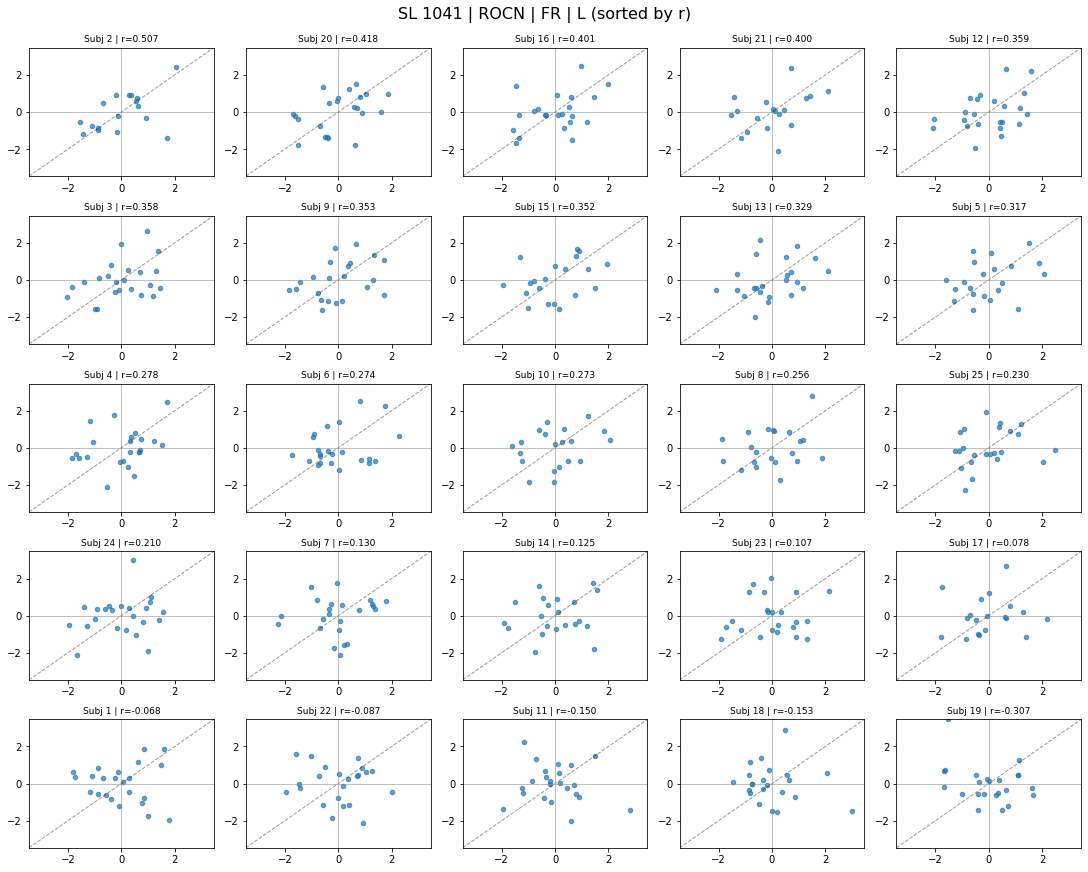

In [18]:
plot_reliability_vs_evidence_per_subject(
    roi_id=1041,      # your chosen SL index
    hem='L',
    sl_index=1041,    # same as roi_id here
    network='ROCN',
    trial_type='FR',
    z=True
)


In [21]:
measure_list

['subj_reliability~evidence', 'group_reliability~evidence', 'm0_r2', 'm1_r2']

In [23]:
scores['ROCN']['GR']

{'ROCN': {'GR': {'subj_reliability~evidence': {'L': array([[[ 4.71453800e-02,  8.13998342e-02, -3.43486867e-02, ...,
             -3.72673377e-01,  3.18147508e-01, -1.36175709e-01],
            [-1.63165853e-01, -1.89983608e-01,  1.13809443e-02, ...,
             -7.28584471e-02, -2.32231379e-01, -1.46337269e-02],
            [ 3.91699037e-01, -2.21609294e-01,  2.99422190e-05, ...,
              3.71666773e-01,  1.44434047e-02, -8.15823234e-02],
            ...,
            [-1.36791799e-01, -6.42482327e-02,  4.08905733e-03, ...,
             -2.80317991e-01,  9.56140536e-02,  1.64587161e-01],
            [-4.31116275e-01,  1.27102104e-01,  2.08847096e-01, ...,
              2.27291511e-01, -4.40084331e-02,  2.58197786e-01],
            [ 5.30804013e-02, -6.64365626e-03, -4.09334340e-02, ...,
              6.34995941e-02, -7.70369779e-03, -4.43186529e-02]],
    
           [[ 3.47248995e-02,  6.26750370e-02,  2.48023064e-01, ...,
              2.10513626e-01,  1.30154098e-01,  3.194415

In [50]:
# def FDR_z_hem(Z,sided=2):
#     '''
#     # Z is dict with L,R, nan indicates invalid verts
#     # Returns q values for each hem
#     # ---> z_cat = np.concatenate((Z['L'], Z['R']))
#     '''
#     z_cat = np.concatenate((Z['L'], Z['R']))
#     valid_inds = np.logical_not(np.isnan(z_cat))
#     q_cat = np.ones(z_cat.shape[0])
    
#     ## 20220912 modification
#     if sided==1:
#         q_cat[valid_inds] = FDR_p(stats.norm.sf(z_cat[valid_inds]))
#     elif sided==2:
#         p = stats.norm.sf(np.abs(z_cat[valid_inds]))*2
#         q_cat[valid_inds] = FDR_p(p)
        
#     q = {}
#     q['L'] = q_cat[:Z['L'].shape[0]]
#     q['R'] = q_cat[Z['R'].shape[0]:]

#     return q

In [6]:
scores[network][trial_type][measuretype]['L'].shape

(1483, 25, 1001)

In [77]:
scores

{'ROCN': {'GR': {'subj_reliability~evidence': {'L': array([[[-0.28732095,  0.13390594,  0.09270788, ...,  0.23788486,
              0.28716218,  0.06329302],
            [ 0.45132566, -0.10224746, -0.20226114, ..., -0.06175372,
             -0.34592235, -0.06269888],
            [ 0.09912706, -0.17329382, -0.04455441, ...,  0.03001151,
             -0.20293512, -0.10919989],
            ...,
            [-0.31844324,  0.11993869, -0.18274026, ...,  0.05366483,
             -0.25547221,  0.10379942],
            [ 0.06796234,  0.18480671,  0.16950168, ..., -0.14472661,
              0.16248285,  0.42745454],
            [-0.00369313,  0.04760664, -0.07529302, ...,  0.27489862,
              0.0836951 , -0.24794335]],
    
           [[-0.2702122 , -0.08508583, -0.13868309, ..., -0.26385032,
              0.52560609, -0.02299487],
            [ 0.1499674 ,  0.03642425, -0.09292782, ...,  0.12061764,
              0.40154807, -0.15183823],
            [-0.12989605,  0.35800436,  0.0946878

In [85]:
import scipy.stats as stats 


nv = 40962 #verts in fsaverage6 brain

measure_key = 'reliability'
calculations = ['m1vsm0_r2', 'subj_{}~evidence'.format(measure_key),'group_{}~evidence'.format(measure_key)]


results = {}


results = {}
for network in ['ROCN', 'POCN']:
    results[network] = {}
    for trial_type in ['GR','FR', 'both']:

        results[network][trial_type] = {}

        for measuretype in tqdm_notebook(calculations):
            results[network][trial_type][measuretype] = {}

            print('...MEASURETYPE: {} ....', measuretype)

            if trial_type is not 'both':

                if '~' in measuretype or 'corr' in measuretype :
                    print('....... if isc and ~ in value', measuretype)

                    #average across subj from (nSLs,nSubj,nPerm+1) to (nSLs,nPerm+1)
                    ## added tanh 20240924
                    dd_hem =  {'L':np.tanh(np.arctanh(scores[network][trial_type][measuretype]['L']).mean(1)),
                               'R':np.tanh(np.arctanh(scores[network][trial_type][measuretype]['R']).mean(1))} 

                    dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

                    raw = {'L':[],'R':[]}
                    z = {'L':[],'R':[]}
                    for hem in ['L','R']:
                        z[hem] = nullZ(dd_vox[hem])
                        raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

        #             q = FDR_z_hem(z)

                    results[network][trial_type][measuretype]['raw'] = raw
                    results[network][trial_type][measuretype]['z'] = z
                    results[network][trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)


                if 'change' in measuretype:
                    # calculate which values changed

                    # original correlation values:
                    L_orig = np.tanh(np.arctanh(scores[network][trial_type]['subj_reliability~evidence']['L']).mean(1))
                    R_orig = np.tanh(np.arctanh(scores[network][trial_type]['subj_reliability~evidence']['R']).mean(1))

                    # partial correlation results
                    L_resid = np.tanh(np.arctanh(scores[network][trial_type]['partial_corr_intercept']['L']).mean(1))
                    R_resid = np.tanh(np.arctanh(scores[network][trial_type]['partial_corr_intercept']['R']).mean(1)) 

                    difference = {'L': L_orig - L_resid, 'R': R_orig - R_resid}

                    dd_hem =  {'L':difference['L'],
                               'R':difference['R']} 

                    dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

                    raw = {'L':[],'R':[]}
                    z = {'L':[],'R':[]}
                    for hem in ['L','R']:
                        z[hem] = nullZ(dd_vox[hem])
                        raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

        #             q = FDR_z_hem(z)

                    results[network][trial_type][measuretype]['raw'] = raw
                    results[network][trial_type][measuretype]['z'] = z
                    results[network][trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)    


    ########
    ########
    ########

            elif trial_type is 'both':

                if '~' in measuretype or 'corr' in measuretype :

                    leftmean = np.nanmean(np.stack((scores[network]['GR'][measuretype]['L'], 
                                                    scores[network]['FR'][measuretype]['L'])), 0)

                    rightmean = np.nanmean(np.stack((scores[network]['GR'][measuretype]['R'], 
                                                    scores[network]['FR'][measuretype]['R'])), 0)

                    print('....... if isc and ~ in value', measuretype)

                    #average across subj from (nSLs,nSubj,nPerm+1) to (nSLs,nPerm+1)
                    ## added tanh 20240924
                    dd_hem =  {'L':np.tanh(np.arctanh(leftmean).mean(1)),
                               'R':np.tanh(np.arctanh(rightmean).mean(1))} 

                    dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

                    raw = {'L':[],'R':[]}
                    z = {'L':[],'R':[]}
                    for hem in ['L','R']:
                        z[hem] = nullZ(dd_vox[hem])
                        raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

        #             q = FDR_z_hem(z)

                    results[network][trial_type]['raw'] = raw
                    results[network][trial_type][measuretype]['z'] = z
                    results[network][trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)


                if 'change' in measuretype:
                    # calculate which values changed

                    print("not gonna do anything here")

    #                 # original correlation values:
    #                 L_orig = np.tanh(np.arctanh(scores['subj_reliability~evidence'][trial_type]['L']).mean(1))
    #                 R_orig = np.tanh(np.arctanh(scores['subj_reliability~evidence'][trial_type]['R']).mean(1))

    #                 # partial correlation results
    #                 L_resid = np.tanh(np.arctanh(scores['partial_corr_intercept'][trial_type]['L']).mean(1))
    #                 R_resid = np.tanh(np.arctanh(scores['partial_corr_intercept'][trial_type]['R']).mean(1)) 

    #                 difference = {'L': L_orig - L_resid, 'R': R_orig - R_resid}

    #                 dd_hem =  {'L':difference['L'],
    #                            'R':difference['R']} 

    #                 dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

    #                 raw = {'L':[],'R':[]}
    #                 z = {'L':[],'R':[]}
    #                 for hem in ['L','R']:
    #                     z[hem] = nullZ(dd_vox[hem])
    #                     raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

    #     #             q = FDR_z_hem(z)

    #                 results[trial_type][measuretype]['raw'] = raw
    #                 results[trial_type][measuretype]['z'] = z
    #                 results[trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)            





print('complete.')

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence


/mnt/cup/labs/norman/rmasis/MemPal/analysis/MemPal2024/MemoryPalaceReliability/_searchlight_util.py:43: RuntimeWarning: Mean of empty slice
  means = np.nanmean(X_roll[1:],0)
/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence
complete.


In [86]:
from _mempal_util import save_obj

### DATA
data = results

# data = measures['room2room']['benefits_bySubj_group']
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(date,measure_key)


### saving after doing the correct fisher-z transform
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(20240924,measure_key)



date = 20250524 # revision repo updates
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(date,measure_key)



save_obj(fname2save,data)

print('...', fname2save)

print("complete")

# print('../../PythonData/MemPal2021/output/brainmaps/{}_SL_room2room_cp.pkl'.format(date))



... ../PythonData2024/Output/brainmaps/20250524_reliability2evidence.pkl
complete


In [80]:
# scores[network], measuretype

In [84]:
scores[network]['GR'].keys() #[measuretype]

dict_keys(['subj_reliability~evidence', 'group_reliability~evidence', 'm0_r2', 'm1_r2'])

In [5]:
import scipy.stats as stats 


nv = 40962 #verts in fsaverage6 brain
# raw_vox = {} # raw values
# p_vox = {} # non-parametric p-values
# q_vox = {} # q-values from FDR-correction
# z_vox = {} # z-values

## to do stats on searchlights, i want the (values,nPerm+1) or the (values) first
## then i convert to vertex space
## then i average these values in vertex space
## then i do the statistics on them

calculations = ['m1vsm0_r2', 'subj_{}~evidence'.format(measure_key),'group_{}~evidence'.format(measure_key)]

results = {}

# ['room2room', 'room2object', 'isc_rooms', 'isc_objects']

for network in ['ROCN','POCN']:
    results[network] = {}
    for trial_type in ['GR','FR']:
        
        results[network][trial_type] = {}
        
        for measuretype in tqdm_notebook(calculations):
            results[network][trial_type][measuretype] = {}
            
            print('...MEASURETYPE: {} ....', measuretype)

            if '~' in measuretype:
                print('....... if isc and ~ in value', measuretype)

                #average across subj from (nSLs,nSubj,nPerm+1) to (nSLs,nPerm+1)
                ## added tanh 20240924
                dd_hem =  {'L':np.tanh(np.arctanh(scores[network][trial_type][measuretype]['L']).mean(1)),
                           'R':np.tanh(np.arctanh(scores[network][trial_type][measuretype]['R']).mean(1))} 

                dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

                raw = {'L':[],'R':[]}
                z = {'L':[],'R':[]}
                for hem in ['L','R']:
                    z[hem] = nullZ(dd_vox[hem])
                    raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

    #             q = FDR_z_hem(z)

                results[network][trial_type][measuretype]['raw'] = raw
                results[network][trial_type][measuretype]['z'] = z
                results[network][trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)

            elif measuretype == 'm1vsm0_r2': 
                p_vox = {'L':[],'R':[]}
                raw_vox = {'L':[],'R':[]}
    #             q_vox = {'L':[],'R':[]}

                dd_hem = {'L':(scores[network][trial_type]['m1_r2']['L']-scores[network][trial_type]['m0_r2']['L']).mean(1),
                          'R':(scores[network][trial_type]['m1_r2']['R']-scores[network][trial_type]['m0_r2']['R']).mean(1)} #nSLs,1 fscore, nPerm)

                dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False)

                for hem in ['L','R']:
                    p_vox[hem] = NonparametricP(dd_vox[hem],sided=2) ## p-value from F-Score
                    raw_vox[hem] = dd_vox[hem][:,0] #

                q_vox = FDR_p_hem(p_vox) #nonparametric version

                results[network][trial_type][measuretype]['raw'] = raw_vox.copy()
    #             results[measuretype][value]['p'] = dd_p_vox.copy()
                results[network][trial_type][measuretype]['q'] = FDR_p_hem(p_vox)




print('complete.')

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence


/mnt/cup/labs/norman/rmasis/MemPal/analysis/MemPal2024/Scripts2024/_searchlight_util.py:47: RuntimeWarning: Mean of empty slice
  means = np.nanmean(X_roll[1:],0)
/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence
complete.


In [30]:
[measuretype],scores[network][trial_type].keys()

(['subj_reliability~evidence'],
 dict_keys(['subj_reliability~evidence', 'group_reliability~evidence', 'm0_r2', 'm1_r2']))

In [14]:
results['ROCN']['GR'].keys()

dict_keys(['m1vsm0_r2', 'subj_reliability~evidence', 'group_reliability~evidence'])

In [45]:
results['ROCN']['GR']['subj_reliability~evidence']

{'raw': {'L': array([-0.01774442, -0.01538903,  0.00542713, ...,  0.01261614,
          0.01205661,  0.01125718]),
  'R': array([-0.00841756, -0.00859726,  0.01861111, ..., -0.0016652 ,
         -0.00303572, -0.0022305 ])},
 'q': {'L': array([0.0038416 , 0.00623329, 0.22909979, ..., 0.02572088, 0.02942405,
         0.05963376]),
  'R': array([0.09452211, 0.09294412, 0.0038416 , ..., 0.42521651, 0.33221074,
         0.37734263])}}

In [55]:
vals = np.sort(results['ROCN']['GR']['subj_reliability~evidence']['z']['R'])
vals[~np.isnan(vals)]

array([-7.40817669, -7.40817669, -7.34874617, ...,  5.34383675,
        5.38448823,  5.4027911 ])

In [62]:
measure_key

'reliability'

In [41]:
date

20240401

In [7]:
from _mempal_util import save_obj

### DATA
data = results

# data = measures['room2room']['benefits_bySubj_group']
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(date,measure_key)


### saving after doing the correct fisher-z transform
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(20240924,measure_key)



date = 20250524 # revision repo updates
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(date,measure_key)



save_obj(fname2save,data)

print('...', fname2save)

print("complete")

# print('../../PythonData/MemPal2021/output/brainmaps/{}_SL_room2room_cp.pkl'.format(date))



... ../PythonData2024/Output/brainmaps/20240924_reliability2evidence.pkl
complete
